# Goals
find pairs

In [3]:
%matplotlib inline
import os
import math
import h5py

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [4]:
fdata_dict ={
    'r22'    : '/Users/swasti/code/beamtest/run22-15MeV/2022-04-28_1022_1651155763_15MeVBeam_1hour_run22_tracker_L3.h5',
    'r22-sim': '/Users/swasti/code/beamtest/Sims/15MeV/TKR_15MeVBeam-100000Trig.inc1.id1_sim.L3.h5',
}

In [50]:
fname = fdata_dict['r22']
file = h5py.File(fname,'r')

In [51]:
file.keys()

<KeysViewHDF5 ['tracker']>

In [52]:
file['tracker'].keys()

<KeysViewHDF5 ['energy', 'event_id', 'event_time', 'pulse_height']>

In [53]:
nrg_arr = file['tracker/energy'][...]
nrg_arr[0:10]

array([[ 2.14823653e+09, -1.68300000e+00, -2.37150000e+00,
         7.62500000e+00,  2.64275700e+02,  2.00000000e+00],
       [ 2.14823653e+09,  5.35500000e-01, -3.51900000e+00,
         7.62500000e+00,  1.50248910e+03,  2.00000000e+00],
       [ 2.14823653e+09, -1.68300000e+00, -3.51900000e+00,
         7.62500000e+00,  2.64275700e+02,  3.00000000e+00],
       [ 2.14823653e+09,  5.35500000e-01, -2.37150000e+00,
         7.62500000e+00,  1.50248910e+03,  3.00000000e+00],
       [ 2.14823653e+09, -4.36050000e+00, -9.94500000e-01,
         3.82500000e+00,  8.31008500e+01,  1.00000000e+00],
       [ 2.14823653e+09, -3.00900000e+00, -2.32050000e+00,
         5.72500000e+00,  6.43246850e+02,  1.00000000e+00],
       [ 2.14823653e+09,  7.65000000e-02, -3.82500000e-01,
         7.62500000e+00,  8.76184800e+02,  1.00000000e+00],
       [ 2.14823653e+09,  3.62100000e+00, -3.90150000e+00,
         3.82500000e+00,  1.16521380e+03,  1.00000000e+00],
       [ 2.14823653e+09, -1.24950000e+00,  8.925

# Looking at the nrg array
We avoid the last 1s. 

* We want to pick events with multiple tracker hits.
  * same event id, different z.
* We want multiple hit on z.
  * same z and same event id, butt more than1.

* We want them to have flag of 2 or 3. 



In [54]:
nevt = nrg_arr[:,0]

In [55]:
uniq_nevt,  ret_ind,uniq_counts = np.unique(nevt, return_counts=True, return_index=True)

In [56]:
np.where(uniq_counts>8)

(array([    38,    131,    161, ..., 141174, 141210, 141267]),)

In [57]:
uniq_counts[0:10], ret_ind[0:10]

(array([6, 2, 1, 3, 2, 2, 1, 2, 3, 2]),
 array([ 0,  6,  8,  9, 12, 14, 16, 17, 19, 22]))

In [58]:
uniq_counts[521]

1

In [59]:
np.set_printoptions(suppress=True)

In [50]:
formatted_numbers = ['{:.0f}'.format(num) for num in nevt]

In [62]:
formatted_numbers[0:6]

['2148236527',
 '2148236527',
 '2148236527',
 '2148236527',
 '2148236527',
 '2148236527']

# Try first example

In [70]:
# 1st Event ID

In [60]:
#uniq_nevt[229]
no = 229
uniq_nevt[no]

2148237732.0

In [61]:
sel_ind =np.where(nevt==uniq_nevt[no])
np.where(nevt==uniq_nevt[no])

(array([619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631]),)

In [62]:
sel_nrg = nrg_arr[sel_ind]
sel_nrg[:,3], sel_nrg[:,5]

(array([1.925, 1.925, 1.925, 3.825, 5.725, 5.725, 3.825, 3.825, 1.925,
        5.725, 5.725, 3.825, 0.025]),
 array([2., 3., 2., 3., 3., 3., 2., 2., 3., 2., 2., 3., 1.]))

In [63]:
x = sel_nrg[:,1]
y = sel_nrg[:,2]
z = sel_nrg[:,3]
c = sel_nrg[:,5]

In [64]:
x

array([0.663 , 0.5355, 0.5355, 0.2805, 0.3825, 0.1275, 0.2805, 0.1785,
       0.663 , 0.3825, 0.1275, 0.1785, 0.9945])

In [65]:
for i in range(len(sel_nrg)):
    print(i,z[i],c[i])

0 1.9250000000000007 2.0
1 1.9250000000000007 3.0
2 1.9250000000000007 2.0
3 3.825 3.0
4 5.725 3.0
5 5.725 3.0
6 3.825 2.0
7 3.825 2.0
8 1.9250000000000007 3.0
9 5.725 2.0
10 5.725 2.0
11 3.825 3.0
12 0.025000000000000355 1.0


In [66]:
c

array([2., 3., 2., 3., 3., 3., 2., 2., 3., 2., 2., 3., 1.])

In [67]:
x1 =[x[9],x[6],x[0]]
y1 =[y[9],y[6],y[0]]
z1 = [z[9],z[6],z[0]]

x2 =[x[10],x[7],x[2]]
y2 =[y[10],y[7],y[2]]
z2 = [z[10],z[7],z[2]]

x3 =[x[4],x[5],x[3],x[11], x[1],x[8]]
y3 =[y[4],y[5],y[3],y[11], y[1],y[8]]
z3 = [z[4],z[5],z[3],z[11], z[1],z[8]]

x4 = x[12]
y4 = y[12]
z4 = z[12]

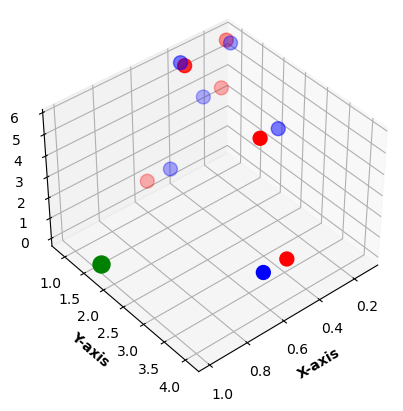

In [72]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D 
ax = plt.axes(projection ="3d")

ax.scatter(x1,y1,z1,c='r',s=100)
# ax.plot(x1,y1,z1,c ='r')

ax.scatter(x2,y2,z2,c='r',s=100)
# ax.plot(x2,y2,z2,c='r')

ax.scatter(x3,y3,z3,c='b',s=100)

ax.scatter(x4,y4,z4,c='g',s=150)

ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

ax.view_init(elev=40, azim=50)

plt.show()

Get the actual coordinates between the 2 hits and choose the better quality.